# Burgers equation
$u_t + uu_x = 0.1 u_{xx}$

In [1]:
import numpy as np
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from utils_0 import *

In [2]:
data = sio.loadmat('DATA/burgers.mat')
u = data['usol'].real
x = data['x'][0].real
t = data['t'][:,0].real
dt = t[1]-t[0]
dx = x[2]-x[1]

/tmp/ipykernel_77074/3130157524.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


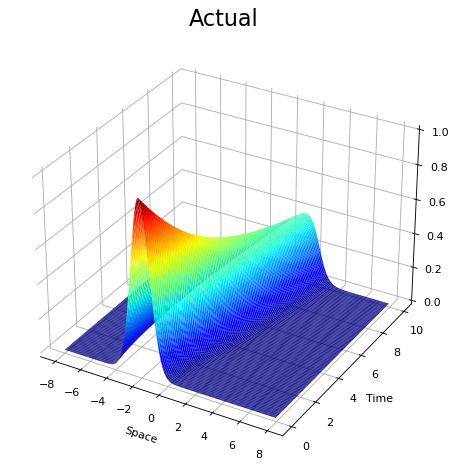

In [3]:
# plotting U field as a Surface
fig = plt.figure(figsize=(11, 7), dpi=80)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, t)
ax.plot_surface(X, Y, u.T, cmap='jet', rstride=1, cstride=1)
plt.title('Actual', fontsize = 20)
plt.xlabel('Space')
plt.ylabel('Time');
# Get rid of colored axes planes

# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# get rid of the grid as well:
ax.grid(True)


In [4]:
Ut, R, rhs_des = build_linear_system(u, dt, dx, D=6, P=6, time_diff = 'FD', space_diff = 'FD')
['1'] + rhs_des[1:]

['1',
 'u',
 'u^2',
 'u^3',
 'u^4',
 'u^5',
 'u^6',
 'u_{x}',
 'uu_{x}',
 'u^2u_{x}',
 'u^3u_{x}',
 'u^4u_{x}',
 'u^5u_{x}',
 'u^6u_{x}',
 'u_{xx}',
 'uu_{xx}',
 'u^2u_{xx}',
 'u^3u_{xx}',
 'u^4u_{xx}',
 'u^5u_{xx}',
 'u^6u_{xx}',
 'u_{xxx}',
 'uu_{xxx}',
 'u^2u_{xxx}',
 'u^3u_{xxx}',
 'u^4u_{xxx}',
 'u^5u_{xxx}',
 'u^6u_{xxx}',
 'u_{xxxx}',
 'uu_{xxxx}',
 'u^2u_{xxxx}',
 'u^3u_{xxxx}',
 'u^4u_{xxxx}',
 'u^5u_{xxxx}',
 'u^6u_{xxxx}',
 'u_{xxxxx}',
 'uu_{xxxxx}',
 'u^2u_{xxxxx}',
 'u^3u_{xxxxx}',
 'u^4u_{xxxxx}',
 'u^5u_{xxxxx}',
 'u^6u_{xxxxx}',
 'u_{xxxxxx}',
 'uu_{xxxxxx}',
 'u^2u_{xxxxxx}',
 'u^3u_{xxxxxx}',
 'u^4u_{xxxxxx}',
 'u^5u_{xxxxxx}',
 'u^6u_{xxxxxx}']

In [5]:
R.shape

(25856, 49)

### FIND-SINDy                                              

In [6]:
w = TrainSTRidge(R,Ut,10**-5,0.1)
print("PDE derived using STRidge")
print_pde(w, rhs_des)

PDE derived using STRidge
u_t = (-1.000403 +0.000000i)uu_{x}
    + (0.100145 +0.000000i)u_{xx}
   


In [7]:
True_theta = np.zeros(49)
True_theta[8] = -1
True_theta[14] = 0.1

In [8]:
print('FIND-SINDy L2 (0% noise)  :',np.linalg.norm(True_theta - w.reshape(-1))/np.linalg.norm(True_theta))

FIND-SINDy L2 (0% noise)  : 0.0004264211906055885


## Sindy

In [9]:
dxdt = np.column_stack(( Ut ))
lam = 0.095
Xi = sindy(lam,R,dxdt)
print_pde(Xi, rhs_des)

u_t = (-0.986845 +0.000000i)uu_{x}
    + (-0.209236 +0.000000i)u^2u_{x}
    + (0.972334 +0.000000i)u^3u_{x}
    + (-2.032646 +0.000000i)u^4u_{x}
    + (2.000307 +0.000000i)u^5u_{x}
    + (-0.751697 +0.000000i)u^6u_{x}
    + (0.100168 +0.000000i)u_{xx}
   


In [10]:
print('SINDy L2 (0% noise)  :',np.linalg.norm(True_theta - Xi.reshape(-1))/np.linalg.norm(True_theta))

SINDy L2 (0% noise)  : 3.0969983971116255


## Variational Bayes

In [11]:
tol = 0.0001
pip = 0.9
verbosity = True
xdts = np.reshape(Ut, -1)
initz0 = initialization(w)
DS = Variational_Bayes_code(R, xdts, initz0, tol, pip, verbosity)
print('zmean  ',  DS['zmean'])
print('model_Index  ',DS['modelIdx'])
print('Wsel  ', DS['Wsel'])
print('Wcov  ', DS['Wcov'])

/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))


Iteration = 0  log(Likelihood) = 118216.9750088924
Iteration = 1  log(Likelihood) = 122784.71204023685
Iteration = 2  log(Likelihood) = 122786.53724545895
Iteration = 3  log(Likelihood) = 122786.53725384016
zmean   [1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
model_Index   [ 7 13]
Wsel   [-1.00005822  0.10016541]
Wcov   [3.97113319e-08 2.23841719e-09]


In [12]:
print('Theta :',DS['Wsel'])
vb_theta = DS['wmean']
vb_theta[0] = 0
nl = R.shape[1]
zmean = DS['zmean']
zmean[0] = 0
print('VB L2 (0% noise)  :',np.linalg.norm(True_theta - vb_theta.reshape(-1))/np.linalg.norm(True_theta))

Theta : [-1.00005822  0.10016541]
VB L2 (0% noise)  : 0.0001744833342479306


In [13]:
print_pde(vb_theta, rhs_des)

u_t = (-1.000058 +0.000000i)uu_{x}
    + (0.100165 +0.000000i)u_{xx}
   


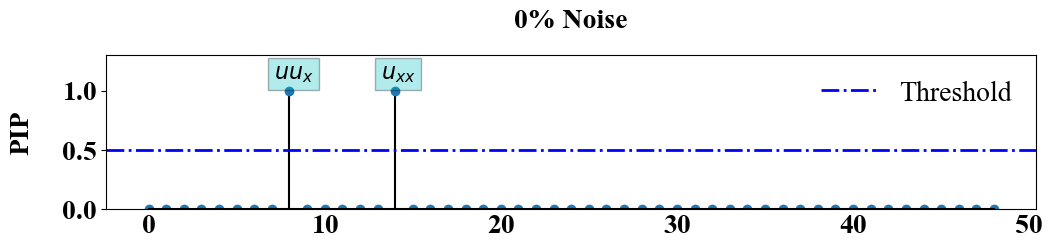

In [14]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

figure1 = plt.figure(figsize=(12, 2))
xr = np.array(range(nl))

plt.stem(xr, zmean, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')

plt.ylabel('PIP', fontweight='bold', labelpad=20)
plt.title('0% Noise', fontweight='bold', fontsize=20, pad=20)
plt.grid(False)
plt.ylim(0, 1.3)

plt.xticks(fontweight='bold')
plt.yticks([0, 0.5, 1], fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both', length=0)

plt.text(9.35, 1.1, '$uu_{x}$', bbox=dict(facecolor='c', alpha=0.3), fontsize=16, ha='right')
plt.text(13.2, 1.1, '$u_{xx}$', bbox=dict(facecolor='c', alpha=0.3), fontsize=16)

plt.legend(loc='upper right', frameon=False, fontsize=20)

plt.show()


## 1% Noise

In [15]:
np.random.seed(0)
un1 = u + 0.01*np.std(u)*np.random.randn(u.shape[0], u.shape[1])
Utn1, Rn1, rhs_des1 = build_linear_system(un1, dt, dx, D=6, P=6, time_diff='poly',
                                          deg_x=8, deg_t=8,
                                          width_x=30, width_t=20)

### FIND-SINDy                                              

In [16]:
w1 = TrainSTRidge(Rn1, Utn1, 10**-3, 0.1)
print("PDE derived using STRidge")
print_pde(w1, rhs_des1)

PDE derived using STRidge
u_t = (-0.999211 +0.000000i)uu_{x}
    + (0.113774 +0.000000i)u_{xx}
   


In [17]:
print('FIND-SINDy L2 (1% noise)  :',np.linalg.norm(True_theta - w1.reshape(-1))/np.linalg.norm(True_theta))

FIND-SINDy L2 (1% noise)  : 0.013728605648822745


## Sindy

In [18]:
dxdt = np.column_stack((Utn1))
lam = 20
Xi_n1 = sindy(lam, Rn1, dxdt)
print_pde(Xi_n1, rhs_des)

u_t = (-60.444144 +0.000000i)u^3u_{x}
    + (264.762914 +0.000000i)u^4u_{x}
    + (-416.544237 +0.000000i)u^5u_{x}
    + (227.075885 +0.000000i)u^6u_{x}
    + (27.073453 +0.000000i)u^2u_{xx}
    + (-185.516305 +0.000000i)u^3u_{xx}
    + (487.471343 +0.000000i)u^4u_{xx}
    + (-570.435388 +0.000000i)u^5u_{xx}
    + (249.049001 +0.000000i)u^6u_{xx}
   


In [19]:
print('SINDy L2 (1% noise)  :',np.linalg.norm(True_theta - Xi_n1.reshape(-1))/np.linalg.norm(True_theta))

SINDy L2 (1% noise)  : 974.4386462484425


## Variational Bayes

In [20]:
tol = 0.00000001
pip = 0.9
verbosity = True
initz0 = initialization(w1)
xdts = np.reshape(Utn1, -1)
DS = Variational_Bayes_code(Rn1, xdts, initz0, tol, pip, verbosity)
print('zmean  ',  DS['zmean'])
print('model_Index  ',DS['modelIdx'])
print('Wsel  ', DS['Wsel'])
print('Wcov  ', DS['Wcov'])

Iteration = 0  log(Likelihood) = 39229.08290738564
Iteration = 1  log(Likelihood) = 39452.26852072927
Iteration = 2  log(Likelihood) = 39452.296652331184
Iteration = 3  log(Likelihood) = 39452.29665281512
Iteration = 4  log(Likelihood) = 39452.29665281505
OOPS!  log(like) decreasing!!
Iteration = 5  log(Likelihood) = 39452.29665281509
zmean   [1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
model_Index   [ 7 13]
Wsel   [-0.99682386  0.11324904]
Wcov   [2.45421208e-06 1.10663875e-07]


In [21]:
print('Theta :',DS['Wsel'])
vb_theta_n1 = DS['wmean']
vb_theta_n1[0] = 0
zmean1 = DS['zmean']
zmean1[0] = 0
print('VB L2 (1% noise)  :',np.linalg.norm(True_theta - vb_theta_n1.reshape(-1))/np.linalg.norm(True_theta) )

Theta : [-0.99682386  0.11324904]
VB L2 (1% noise)  : 0.013556806556061719


In [22]:
print_pde(vb_theta_n1, rhs_des)

u_t = (-0.996824 +0.000000i)uu_{x}
    + (0.113249 +0.000000i)u_{xx}
   


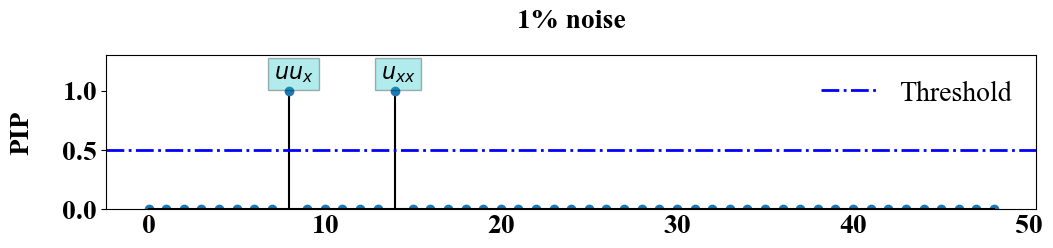

In [23]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

figure1 = plt.figure(figsize=(12, 2))
xr = np.array(range(nl))

plt.stem(xr, zmean1, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')

plt.ylabel('PIP', fontweight='bold', labelpad=20)
plt.title('1% noise', fontweight='bold', fontsize=20, pad=20)
plt.grid(False)
plt.ylim(0, 1.3)

plt.xticks(fontweight='bold')
plt.yticks([0, 0.5, 1], fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both', length=0)

plt.text(9.35, 1.1, '$uu_{x}$', bbox=dict(facecolor='c', alpha=0.3), fontsize=16, ha='right')
plt.text(13.2, 1.1, '$u_{xx}$', bbox=dict(facecolor='c', alpha=0.3), fontsize=16)

plt.legend(loc='upper right', frameon=False, fontsize=20)
plt.show()


## 2% Noise

In [24]:
np.random.seed(0)
un2 = u + 0.02*np.std(u)*np.random.randn(u.shape[0], u.shape[1])
Utn2, Rn2, rhs_des2 = build_linear_system(un2, dt, dx, D=6, P=6, time_diff='poly',
                                          deg_x=8, deg_t=8,
                                          width_x=30, width_t=20)

### FIND-SINDy                                              

In [25]:
lam = 10**-3
d_tol = 0.1
w2 = TrainSTRidge(Rn2, Utn2, lam, d_tol)
print_pde(w2, rhs_des2)

u_t = (-0.998320 +0.000000i)uu_{x}
    + (0.113517 +0.000000i)u_{xx}
   


In [26]:
print('FIND-SINDy L2 (2% noise)  :',np.linalg.norm(True_theta - w1.reshape(-1))/np.linalg.norm(True_theta) )

FIND-SINDy L2 (2% noise)  : 0.013728605648822745


## Sindy

In [27]:
dxdt = np.column_stack((Utn2))
lam = 20
Xi_n2 = sindy(lam, Rn2, dxdt)
print_pde(Xi_n2, rhs_des)

u_t = (-118.540593 +0.000000i)u^3u_{x}
    + (616.261236 +0.000000i)u^4u_{x}
    + (-1091.830988 +0.000000i)u^5u_{x}
    + (647.969232 +0.000000i)u^6u_{x}
   


In [28]:
print('SINDy L2 (2% noise)  :',np.linalg.norm(True_theta - Xi_n2.reshape(-1))/np.linalg.norm(True_theta))

SINDy L2 (2% noise)  : 1409.2304704908213


## Variational Bayes

In [29]:
tol = 0.000001
pip = 0.9
verbosity = True
initz0 = initialization(w2)
xdts = np.reshape(Utn2, -1)
DS = Variational_Bayes_code(Rn2, xdts, initz0, tol, pip, verbosity)
print('zmean',  DS['zmean']) 
print('wmean',  DS['wmean']) 
print('modelId',  DS['modelIdx']) 
print('Wsel',  DS['Wsel']) 
print('Wcov',  DS['Wcov'])

Iteration = 0  log(Likelihood) = 38592.7265091223
Iteration = 1  log(Likelihood) = 38786.67439015715
Iteration = 2  log(Likelihood) = 38786.69654379614
Iteration = 3  log(Likelihood) = 38786.6965441758
zmean [1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
wmean [-7.93395957e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -9.95934583e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.13022401e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0

In [30]:
np.sqrt(DS['Wcov'])

array([0.00165575, 0.00035149])

In [31]:
print('Theta :',DS['Wsel'])
vb_theta_n2 = DS['wmean']
vb_theta_n2[0] = 0
zmean2 = DS['zmean']
zmean2[0] = 0
print('VB L2 (2% noise)  :',np.linalg.norm(True_theta - vb_theta_n2.reshape(-1))/np.linalg.norm(True_theta))

Theta : [-0.99593458  0.1130224 ]
VB L2 (2% noise)  : 0.013574530121937203


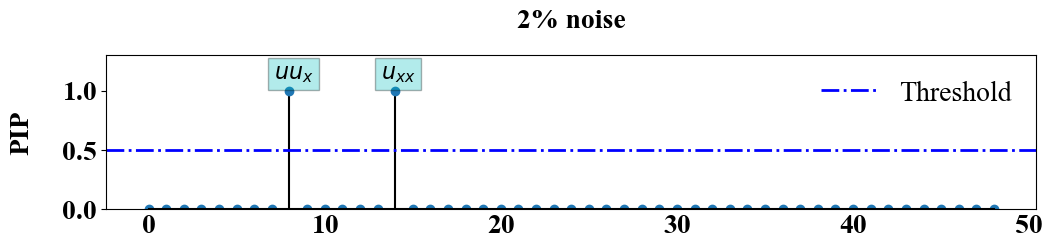

In [32]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

figure1 = plt.figure(figsize=(12, 2))
xr = np.array(range(nl))

plt.stem(xr, zmean2, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')

plt.ylabel('PIP', fontweight='bold', labelpad=20)
plt.title('2% noise', fontweight='bold', fontsize=20, pad=20)
plt.grid(False)
plt.ylim(0, 1.3)

plt.xticks(fontweight='bold')
plt.yticks([0, 0.5, 1], fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both', length=0)

plt.text(9.35, 1.1, '$uu_{x}$', bbox=dict(facecolor='c', alpha=0.3), fontsize=16, ha='right')
plt.text(13.2, 1.1, '$u_{xx}$', bbox=dict(facecolor='c', alpha=0.3), fontsize=16)

plt.legend(loc='upper right', frameon=False, fontsize=20)
plt.show()


## 5% Noise

In [33]:
np.random.seed(0)
un5 = u + 0.05*np.std(u)*np.random.randn(u.shape[0], u.shape[1])
Utn5, Rn5, rhs_des5 = build_linear_system(un5, dt, dx, D=6, P=6, time_diff='poly',
                                          deg_x=9, deg_t=9,
                                          width_x=30, width_t=30)

### FIND-SINDy                                              

In [34]:
lam = 10e-4
d_tol = 0.2
w5 = TrainSTRidge(Rn5, Utn5, lam, d_tol)
print_pde(w5, rhs_des5)

u_t = (-0.979747 +0.000000i)uu_{x}
    + (0.104190 +0.000000i)u_{xx}
   


In [35]:
print('FIND-SINDy L2 (5% noise)  :',np.linalg.norm(True_theta - w5.reshape(-1))/np.linalg.norm(True_theta) )

FIND-SINDy L2 (5% noise)  : 0.02057942537381022


## Sindy

In [36]:
dxdt = np.column_stack((Utn5))
lam = 20
Xi_n5 = sindy(lam, Rn5, dxdt)
print_pde(Xi_n5, rhs_des)

u_t = (-20.920360 +0.000000i)u^3u_{x}
    + (159.988205 +0.000000i)u^5u_{x}
    + (-180.542549 +0.000000i)u^6u_{x}
    + (32.085551 +0.000000i)u^2u_{xx}
    + (-236.803536 +0.000000i)u^3u_{xx}
    + (686.097436 +0.000000i)u^4u_{xx}
    + (-903.758889 +0.000000i)u^5u_{xx}
    + (450.871811 +0.000000i)u^6u_{xx}
   


In [37]:
print('SINDy L2 (5% noise)  :',np.linalg.norm(True_theta - Xi_n5.reshape(-1))/np.linalg.norm(True_theta) )

SINDy L2 (5% noise)  : 1261.19977397937


## Variational Bayes

In [38]:
tol = 0.000001
pip = 0.9
verbosity = True
initz0 = initialization(w5)
xdts = Utn5.reshape(-1)
DS = Variational_Bayes_code(Rn5, xdts, initz0, tol, pip, verbosity)
print('zmean',  DS['zmean']) 
print('wmean',  DS['wmean']) 
print('modelId',  DS['modelIdx']) 
print('Wsel',  DS['Wsel']) 
print('Wcov',  DS['Wcov'])

Iteration = 0  log(Likelihood) = 25302.46302298181
Iteration = 1  log(Likelihood) = 25461.561969794493
Iteration = 2  log(Likelihood) = 25461.597233673805
Iteration = 3  log(Likelihood) = 25461.597235016223
Iteration = 4  log(Likelihood) = 25461.597235016314
zmean [1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
wmean [-3.32578561e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -9.73802069e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.03930429e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.0000000

In [39]:
print('Theta :',DS['Wsel'])
vb_theta_n5 = DS['wmean']
vb_theta_n5[0] = 0
zmean5 = DS['zmean']
zmean5[0] = 0
print('VB L2 (5% noise)  :',np.linalg.norm(True_theta - vb_theta_n5.reshape(-1))/np.linalg.norm(True_theta) )

Theta : [-0.97380207  0.10393043]
VB L2 (5% noise)  : 0.026359657849416396


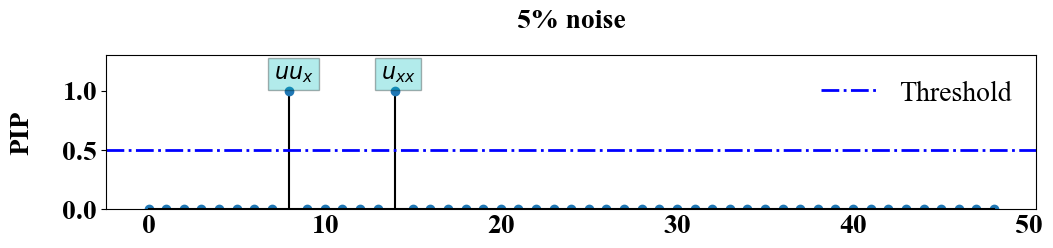

In [40]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

figure1 = plt.figure(figsize=(12, 2))

xr = np.array(range(nl))

plt.stem(xr, zmean5, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')

# plt.xlabel('Basis functions (5% noise)', fontweight='bold', labelpad=20)
plt.ylabel('PIP', fontweight='bold', labelpad=20)
plt.title('5% noise', fontweight='bold', fontsize=20, pad=20)
plt.grid(False)
plt.ylim(0, 1.3)

plt.xticks(fontweight='bold')
plt.yticks([0, 0.5, 1], fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both', length=0)

plt.text(9.35, 1.1, '$uu_{x}$', bbox=dict(facecolor='c', alpha=0.3), fontsize=16, ha='right')
plt.text(13.2, 1.1, '$u_{xx}$', bbox=dict(facecolor='c', alpha=0.3), fontsize=16)

plt.legend(loc='upper right', frameon=False, fontsize=20)

plt.show()


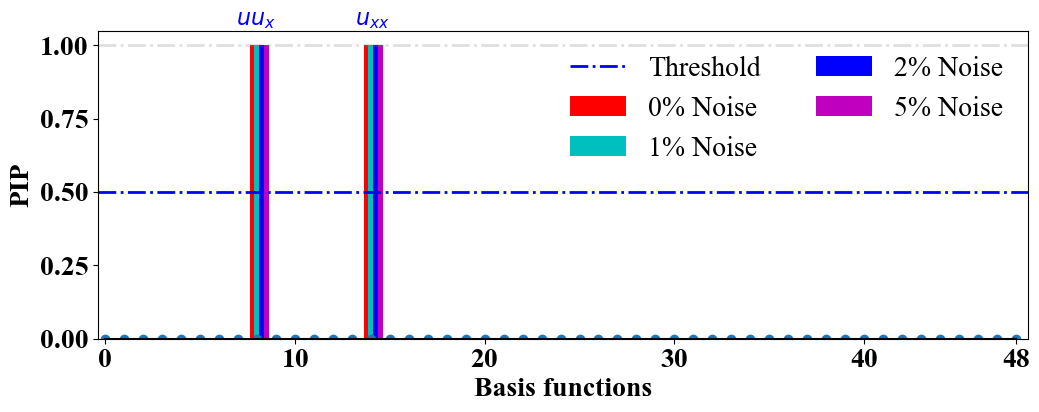

In [41]:
fig = plt.figure(figsize=(12,4))
plt.stem(xr, zmean5*0, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.bar(xr - 0.25, zmean, color = 'r', width = 0.25, label='0% Noise')
plt.bar(xr + 0.0, zmean1, color = 'c', width = 0.25, label='1% Noise')
plt.bar(xr + 0.25, zmean2, color = 'b', width = 0.25, label='2% Noise')
plt.bar(xr + 0.50, zmean5, color = 'm', width = 0.25, label='5% Noise')
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')
plt.axhline(y=1.0, color='grey', linestyle='-.', alpha=0.25, linewidth=2)

plt.xlabel('Basis functions', fontweight='bold')
plt.ylabel('PIP', fontweight='bold')
plt.grid(False)
plt.ylim(0, 1.05)

plt.xticks([0, 10, 20, 30, 40, 48], fontweight='bold')
plt.yticks([0, 0.25, 0.5, 0.75, 1], fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both')
plt.margins(0)

plt.text(9, 1.07, '$uu_{x}$', color='blue', fontsize=16, ha='right')
plt.text(15, 1.07, "$u_{xx}$", color='blue', fontsize=16, ha='right')

plt.legend(loc='upper right', ncol=2, frameon=False, fontsize=20)

plt.show()
fig.savefig('images/1D_Burgers_combined.pdf',format='pdf',dpi=600,bbox_inches='tight')

## 10% Noise

In [42]:
np.random.seed(0)
un10 = u + 0.1*np.std(u)*np.random.randn(u.shape[0], u.shape[1])
Utn10, Rn10, rhs_des10 = build_linear_system(un10, dt, dx, D=6, P=6, time_diff='poly',
                                          deg_x=9, deg_t=9,
                                          width_x=30, width_t=30)

### FIND-SINDy                                              

In [43]:
lam = 10e-4
d_tol = 0.2
w10 = TrainSTRidge(Rn10, Utn10, lam, d_tol)
print_pde(w10, rhs_des10)

u_t = (-0.963217 +0.000000i)uu_{x}
    + (0.098022 +0.000000i)u_{xx}
   


In [44]:
print('FIND-SINDy L2 (10% noise)  :',np.linalg.norm(True_theta - w10.reshape(-1))/np.linalg.norm(True_theta) )

FIND-SINDy L2 (10% noise)  : 0.0366531695840648


## Sindy

In [45]:
dxdt = np.column_stack((Utn10))
lam = 20
Xi_n10 = sindy(lam, Rn10, dxdt)
print_pde(Xi_n10, rhs_des10)

u_t = (-151.724668 +0.000000i)u^4u_{x}
    + (508.429649 +0.000000i)u^5u_{x}
    + (-436.105971 +0.000000i)u^6u_{x}
    + (101.666608 +0.000000i)u^3u_{xx}
    + (-534.875528 +0.000000i)u^4u_{xx}
    + (940.128280 +0.000000i)u^5u_{xx}
    + (-549.526778 +0.000000i)u^6u_{xx}
   


In [46]:
print('SINDy L2 (10% noise)  :',np.linalg.norm(True_theta - Xi_n10.reshape(-1))/np.linalg.norm(True_theta))

SINDy L2 (10% noise)  : 1390.903724126644


## Variational Bayes

In [47]:
tol = 0.00000001
pip = 0.9
verbosity = True
initz0 = initialization(w10)
xdts = Utn10.reshape(-1)
DS = Variational_Bayes_code(Rn10, xdts, initz0, tol, pip, verbosity)
print('zmean',  DS['zmean']) 
print('wmean',  DS['wmean']) 
print('modelId',  DS['modelIdx']) 
print('Wsel',  DS['Wsel']) 
print('Wcov',  DS['Wcov'])

/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))


Iteration = 0  log(Likelihood) = 21742.34496378365
Iteration = 1  log(Likelihood) = 21781.539830031914
Iteration = 2  log(Likelihood) = 21781.543854102834
Iteration = 3  log(Likelihood) = 21781.54385425246
Iteration = 4  log(Likelihood) = 21781.54385425245
OOPS!  log(like) decreasing!!
Iteration = 5  log(Likelihood) = 21781.543854252464
zmean [1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
wmean [-7.13041117e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -9.56531896e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  9.75997924e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000

In [48]:
print('Theta :',DS['Wsel'])
vb_theta_n10 = DS['wmean']
vb_theta_n10[0] = 0
zmean10 = DS['zmean']
zmean10[0] = 0
print('VB L2 (10% noise)  :',np.linalg.norm(True_theta - vb_theta_n10.reshape(-1))/np.linalg.norm(True_theta) )

Theta : [-0.9565319   0.09759979]
VB L2 (10% noise)  : 0.04331826845046343


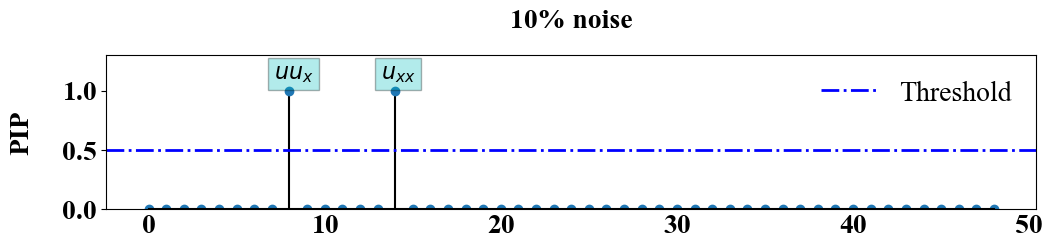

In [49]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

figure1 = plt.figure(figsize=(12, 2))

xr = np.array(range(nl))

plt.stem(xr, zmean10, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')

plt.ylabel('PIP', fontweight='bold', labelpad=20)
plt.title('10% noise', fontweight='bold', fontsize=20, pad=20)
plt.grid(False)
plt.ylim(0, 1.3)

plt.xticks(fontweight='bold')
plt.yticks([0, 0.5, 1], fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both', length=0)

plt.text(9.35, 1.1, '$uu_{x}$', bbox=dict(facecolor='c', alpha=0.3), fontsize=16, ha='right')
plt.text(13.2, 1.1, '$u_{xx}$', bbox=dict(facecolor='c', alpha=0.3), fontsize=16)

plt.legend(loc='upper right', frameon=False, fontsize=20)

plt.show()


## 15% Noise

In [50]:
np.random.seed(0)
un15 = u + 0.15*np.std(u)*np.random.randn(u.shape[0], u.shape[1])
Utn15, Rn15, rhs_des15 = build_linear_system(un15, dt, dx, D=6, P=6, time_diff='poly',
                                          deg_x=9, deg_t=9,
                                          width_x=30, width_t=30)

### FIND-SINDy     

In [51]:
lam = 10e-4
d_tol = 0.2
w15 = TrainSTRidge(Rn15, Utn15, lam, d_tol)
print_pde(w15, rhs_des15)

print('FIND-SINDy L2 (15% noise)  :',np.linalg.norm(True_theta - w15.reshape(-1))/np.linalg.norm(True_theta) )

u_t = (-0.818060 -0.000000i)uu_{x}
   
FIND-SINDy L2 (15% noise)  : 0.20658006853255775


## Sindy

In [52]:
dxdt = np.column_stack((Utn10))
lam = 10
Xi_n15 = sindy(lam, Rn15, dxdt)
print_pde(Xi_n15, rhs_des10)

print('SINDy L2 (15% noise)  :',np.linalg.norm(True_theta - Xi_n15.reshape(-1))/np.linalg.norm(True_theta))

u_t = (-95.441390 +0.000000i)u^5u_{x}
    + (150.325593 +0.000000i)u^6u_{x}
    + (92.935672 +0.000000i)u^3u_{xx}
    + (-527.263286 +0.000000i)u^4u_{xx}
    + (1011.265906 +0.000000i)u^5u_{xx}
    + (-648.657668 +0.000000i)u^6u_{xx}
    + (20.227009 +0.000000i)u^4u_{xxx}
    + (-79.708032 +0.000000i)u^5u_{xxx}
    + (76.460056 +0.000000i)u^6u_{xxx}
   
SINDy L2 (15% noise)  : 1325.4461645726708


## Variational Bayes

In [53]:
tol = 0.00000001
pip = 0.9
verbosity = True
initz0 = initialization(w15)
xdts = Utn15.reshape(-1)
DS = Variational_Bayes_code(Rn15, xdts, initz0, tol, pip, verbosity)
print('zmean',  DS['zmean']) 
print('wmean',  DS['wmean']) 
print('modelId',  DS['modelIdx']) 
print('Wsel',  DS['Wsel']) 
print('Wcov',  DS['Wcov'])

print('Theta :',DS['Wsel'])
vb_theta_n15 = DS['wmean']
vb_theta_n15[0] = 0
zmean15 = DS['zmean']
zmean15[0] = 0
print('VB L2 (15% noise)  :',np.linalg.norm(True_theta - vb_theta_n15.reshape(-1))/np.linalg.norm(True_theta) )

Iteration = 0  log(Likelihood) = 16372.88864790323
Iteration = 1  log(Likelihood) = 16372.901633237892
Iteration = 2  log(Likelihood) = 16372.90163372533
Iteration = 3  log(Likelihood) = 16372.901633725342
zmean [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
wmean [-1.95547940e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.12450897e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+0

In [54]:
print_pde(vb_theta_n15, rhs_des10)


u_t = (-0.812451 +0.000000i)uu_{x}
   


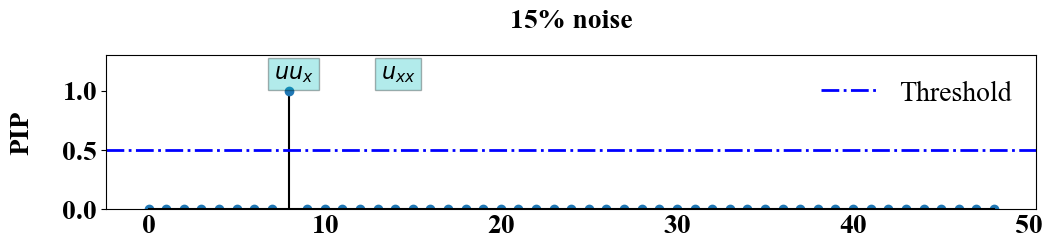

In [55]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

figure1 = plt.figure(figsize=(12, 2))
xr = np.array(range(nl))

plt.stem(xr, zmean15, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')

plt.ylabel('PIP', fontweight='bold', labelpad=20)
plt.title('15% noise', fontweight='bold', fontsize=20, pad=20)
plt.grid(False)
plt.ylim(0, 1.3)

plt.xticks(fontweight='bold')
plt.yticks([0, 0.5, 1], fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both', length=0)

plt.text(9.35, 1.1, '$uu_{x}$', bbox=dict(facecolor='c', alpha=0.3), fontsize=16, ha='right')
plt.text(13.2, 1.1, '$u_{xx}$', bbox=dict(facecolor='c', alpha=0.3), fontsize=16)

plt.legend(loc='upper right', frameon=False, fontsize=20)
plt.show()


## Prediction

In [56]:
mu = 1
nu = 0.1 #kinematic viscosity coefficient
    
# Spatial mesh
L_x = 10 #Range of the domain according to x [m]
dx = 0.01 #Infinitesimal distance
N_x = int(L_x/dx) #Points number of the spatial mesh
X = np.linspace(0,L_x,N_x) #Spatial array

# Temporal mesh
L_t = 8 #Duration of simulation [s]
dt = 0.025  #Infinitesimal time
N_t = int(L_t/dt) #Points number of the temporal mesh
T = np.linspace(0,L_t,N_t) #Temporal array

# Wave number discretization
k = 2*np.pi*np.fft.fftfreq(N_x, d = dx)

# Def of the initial condition    
u0 = np.exp(-(X-3)**2/2)

def burg_system(u,t,k,mu,nu):
    #Spatial derivative in the Fourier domain
    u_hat = np.fft.fft(u)
    u_hat_x = 1j*k*u_hat
    u_hat_xx = -k**2*u_hat
    
    #Switching in the spatial domain
    u_x = np.fft.ifft(u_hat_x)
    u_xx = np.fft.ifft(u_hat_xx)
    
    #ODE resolution
    u_t = -mu*u*u_x + nu*u_xx
    return u_t.real
    
U = odeint(burg_system, u0, T, args=(k,mu,nu,), mxstep=5000).T

In [57]:
# Define the x and y coordinates
def burg_system(u,t,k,mu,nu):
        # Spatial derivative in the Fourier domain
        u_hat = np.fft.fft(u)
        u_hat_x = 1j*k*u_hat
        u_hat_xx = -k**2*u_hat

        # Switching in the spatial domain
        u_x = np.fft.ifft(u_hat_x)
        u_xx = np.fft.ifft(u_hat_xx)

        # ODE resolution
        u_t = -mu*u*u_x + nu*u_xx
        return u_t.real
    
def PREDICTION(mu, nu):
    # Spatial mesh
    L_x = 10 # Range of the domain according to x [m]
    dx = 0.01 # Infinitesimal distance
    N_x = int(L_x/dx) # Points number of the spatial mesh
    X = np.linspace(0,L_x,N_x) # Spatial array

    # Temporal mesh
    L_t = 8 # Duration of simulation [s]
    dt = 0.025  # Infinitesimal time
    N_t = int(L_t/dt) # Points number of the temporal mesh
    T = np.linspace(0,L_t,N_t) # Temporal array

    # Wave number discretization
    k = 2*np.pi*np.fft.fftfreq(N_x, d = dx)

    # Def of the initial condition    
    u0 = np.exp(-(X-3)**2/2)

    # PDE resolution (ODE system resolution)
    U = odeint(burg_system, u0, T, args=(k,mu,nu,), mxstep=5000).T
    return U

In [58]:
mean1 = 1.000
std1 = 0.000199
mean2 = 0.100
std2 =  0.000047
MCMC = 100
pred_arr = []

for i in range (MCMC):
    theta1 = np.random.normal(loc = mean1, scale = std1)
    theta2 = np.random.normal(loc = mean2, scale = std2)
    pred_arr.append(PREDICTION(theta1, theta2))
    
pred_arr = np.array(pred_arr)
UN_pred = PREDICTION(mean1, mean2)
mu_pred = np.mean(pred_arr, axis=0)
std_pred = np.std(pred_arr, axis=0)
up = mu_pred + 2*std_pred
down = mu_pred - 2*std_pred

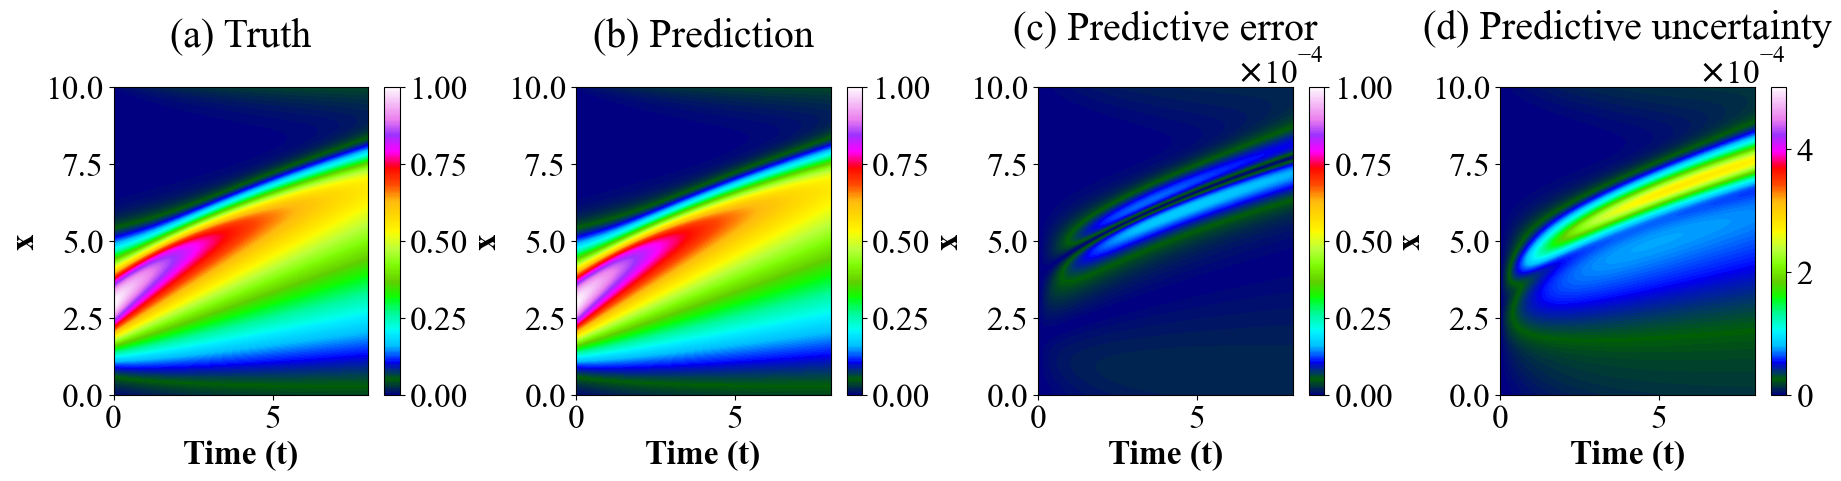

In [59]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 24
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

fig1 = plt.figure(figsize=(22,4))
fig1.subplots_adjust(wspace=0.45)

plt.subplot(1,4,1)
contour = plt.imshow(U, cmap='gist_ncar', extent=[0,8,0,10], aspect='auto', origin='lower',
                    vmin=0, vmax=1)
plt.xlabel('Time (t)', fontweight='bold')  # Increase the font size and adjust the labelpad
plt.ylabel('x', fontweight='bold')  # Increase the font size and adjust the labelpad
plt.title('(a) Truth', pad=30)
colorbar = plt.colorbar(contour, orientation="vertical")
colorbar.formatter.set_powerlimits((-4, 4))
colorbar.update_ticks()
plt.tick_params(axis='both', which='major')

plt.subplot(1,4,2)
contour = plt.imshow(mu_pred, cmap='gist_ncar', extent=[0,8,0,10], aspect='auto', origin='lower',
                    vmin=0, vmax=1)
plt.xlabel('Time (t)', fontweight='bold')  # Increase the font size and adjust the labelpad
plt.ylabel('x', fontweight='bold')  # Increase the font size and adjust the labelpad
plt.title('(b) Prediction', pad=30)
colorbar = plt.colorbar(contour, orientation="vertical")
colorbar.formatter.set_powerlimits((-4, 4))
colorbar.update_ticks()
plt.tick_params(axis='both', which='major')

plt.subplot(1,4,3)
contour = plt.imshow(np.abs(mu_pred-U), extent=[0,8,0,10], cmap='gist_ncar', aspect='auto', origin='lower',
                     vmin=0, vmax=0.0001)
plt.xlabel('Time (t)', fontweight='bold')  # Increase the font size and adjust the labelpad
plt.ylabel('x', fontweight='bold')  # Increase the font size and adjust the labelpad
plt.title('(c) Predictive error', pad=35)
colorbar = plt.colorbar(contour, orientation="vertical")
colorbar.formatter.set_powerlimits((0, 0))
colorbar.formatter.set_useMathText(True)
colorbar.update_ticks()
plt.tick_params(axis='both', which='major')

plt.subplot(1,4,4)
contour = plt.imshow(std_pred, cmap='gist_ncar', extent=[0,8,0,10], aspect='auto', origin='lower',
                    vmin=0, vmax=0.0005)
plt.xlabel('Time (t)', fontweight='bold')  # Increase the font size and adjust the labelpad
plt.ylabel('x', fontweight='bold')  # Increase the font size and adjust the labelpad
plt.title('(d) Predictive uncertainty', pad=35)
colorbar = plt.colorbar(contour, orientation="vertical")
colorbar.formatter.set_powerlimits((0, 0))
colorbar.formatter.set_useMathText(True)
colorbar.update_ticks()
plt.tick_params(axis='both', which='major')
plt.show()

fig1.savefig('images/Prediction_1D_burgers.pdf', format='pdf', dpi=600, bbox_inches='tight')